In [60]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report #评估模型
from sklearn import preprocessing   #数据标准化
#数据是否需要标准化
scale = False  #设置为True需要标准化

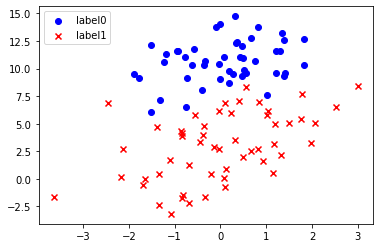

In [29]:
#载入数据
data = np.genfromtxt(r'LR-testSet.csv',delimiter=',')
x_data = data[:,:-1]
y_data = data[:,-1]   #左闭右开

#数据有两个feature

#数据预分类
def plot():
    x0 = [] #0类别的feature1
    y0 = [] #0类别的featurn2
    x1 = [] #1类别的feature1
    y1 = [] #1类别的feature2
    
    #切分不同类别的数据
    for i in range(len(x_data)):
        if y_data[i] == 0:
            x0.append(x_data[i,0])
            y0.append(x_data[i,1])
        else:
            x1.append(x_data[i,0])
            y1.append(x_data[i,1])
    #画图
    scatter0 = plt.scatter(x0,y0,c='b',marker='o')
    scatter1 = plt.scatter(x1,y1,c='r',marker='x')
    #画图例
    plt.legend(handles=[scatter0,scatter1],labels=['label0','label1'],loc='best')
    
plot()
plt.show()

In [51]:
#数据处理
x_data = data[:,:-1]
y_data = data[:,-1,np.newaxis]

print(np.mat(x_data).shape)
print(np.mat(y_data).shape)

#给样本添加偏置项
X_data = np.concatenate((np.ones((100,1)),x_data),axis=1)
print(X_data.shape)

(100, 2)
(100, 1)
(100, 3)


In [80]:
#激活函数
def signoid(x):
    return 1.0/(1 + np.exp(-x))

#损失函数
def cost(xMat,yMat,ws):
    left = np.multiply(yMat,np.log(signoid(xMat*ws)))
    right = np.multiply(1 - yMat,np.log(1 - signoid(xMat*ws)))
    return np.sum(left + right) / (len(xMat))

#梯度下降法
def gradAscent(xArr,yArr):
    
    if scale == True:
        xArr = preprocessing.scale(xArr)
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    
    lr = 0.001
    epochs = 10000
    costtList = []
    #计算数据行列数
    #行代表数据个数，列代表权值个数(特征个数)
    m,n = np.shape(xMat)
    #初始化权值
    ws = np.mat(np.ones((n,1)))
    
    for i in range(epochs+1):       #加1的目的就是为了为了最后达到9999后无法输出的问题
        #xMat矩阵与weights相乘
        h = signoid(xMat*ws)
        #计算误差
        ws_grad = xMat.T*(h - yMat)/m
        ws = ws - lr*ws_grad
        
        if i % 50 == 0:
            costtList.append(cost(xMat,yMat,ws))
    return ws,costtList

In [79]:
#训练模型，得到权值和cost的变化
ws,costList = gradAscent(X_data,y_data)
print(ws.shape)

(3, 1)
(3, 100)


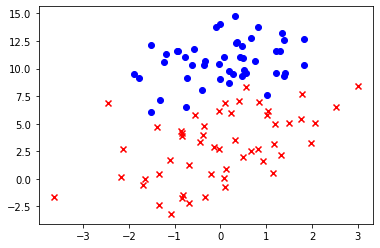

In [59]:
data = np.genfromtxt(r'LR-testSet.csv',delimiter=',')
x_data = data[:,:-1]
y_data = data[:,-1]

#数据预分类
def plot():
    
    x0 = []    #第零类的特征1
    y0 = []    #第零类的特征2
    x1 = []    #第一类的特征1
    y1 = []    #第一类的特征2
    
    for i in range(len(x_data)):
        if y_data[i] == 0:
            x0.append(x_data[i,0])
            y0.append(x_data[i,1])
        else:
            x1.append(x_data[i,0])
            y1.append(x_data[i,1])
            
    #画图
    scatter0 = plt.scatter(x0,y0,c='b',marker='o')
    scatter1 = plt.scatter(x1,y1,c='r',marker='x')

plot()
plt.show()

In [77]:
#激活函数定义
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
#Loss函数
def cost(xMat,yMat,weights):
    left = np.multiply(yMat,np.log(sigmoid(xMat*weights)))
    right = np.multiply(1 - yMat,np.log(1 - sigmoid(xMat*weights)))
    return np.sum(left + right)/len(xMat)

#梯度下降
def grad(xArr,yArr):
    #学习率、迭代次数
    lr = 0.0001
    epochs = 10000
    costList = []
    
    
    #将数据转化为矩阵
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    
    #初始化权重矩阵
    m,n = np.shape(xMat)
    weights = np.ones((n,1))  #数据的特征数等于权重向量的位数
    
    for i in range(epochs):
        f_w = sigmoid(xMat*weights)
        weights_grad = xMat.T*(f_w - yMat)/m
        
        #参数更新
        weights = weights - lr*weights_grad
        
        if i % 50 == 0:          #隔50次保存一次cost的值
            costList.append(cost(xMat,yMat,weights))
    return weights,costList